# Correlation

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import signal
import My_functions_v2 as my
import seaborn as sns
sns.set()

In [2]:
Half_orbit = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_means.pkl')

In [3]:
var1 = 'Density_norm'
var2 = 'FAC'
lag = 2

dt = Half_orbit.index[lag:]-Half_orbit.index[:-lag]
indx = abs(dt.values-np.median(dt.values))< lag*np.timedelta64(5,'m')

data = np.vstack([Half_orbit.loc[:,var1].values[lag:], Half_orbit.loc[:,var2].values[:-lag]])
Delayed_df = pd.DataFrame(np.transpose(data), index=Half_orbit.index[lag:], columns=[var1,var2])
Delayed_df = Delayed_df[indx]
dt_mean = np.mean(dt[indx])

In [4]:
Half_orbit.columns

Index(['Density_norm', 'FAC', 'FAC_power', 'Density', 'Altitude', 'Orbit_nr',
       'Hemisphere', 'AP_INDEX', 'Kp', 'F10_INDEX', 'BY_GSM', 'BZ_GSM',
       'Bulk_speed', 'F10_Mean', 'PyAmps'],
      dtype='object')

In [5]:
var2=['FAC','FAC_power','Kp','AP_INDEX','PyAmps']
corr ,N,lag,dt = my.correlation(Half_orbit,'Density_norm',var2,minlag = -5,maxlag = 15)

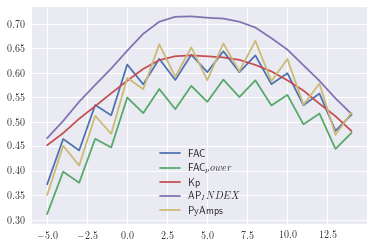

In [6]:

plt.figure()
for i in range(len(var2)):
    plt.plot(lag,corr[i,:],label = var2[i])
plt.legend()

In [7]:
shift2_df,dt=my.shift_time(Half_orbit,'Density_norm',var2,2)

In [8]:
shift2_df.head()

,Density_norm,FAC,FAC_power,Kp,AP_INDEX,PyAmps
2015-01-02 02:24:40,5.577984e-13,0.104478,0.284759,3.0,15.0,1.769016
2015-01-02 03:11:35,7.597623e-13,0.139248,0.372618,3.0,15.0,2.962752
2015-01-02 03:58:30,5.691719e-13,0.113231,0.390340,3.0,15.0,1.880936
2015-01-02 04:45:25,7.214728e-13,0.181961,0.565810,1.0,4.0,4.111182
2015-01-02 05:32:20,5.458171e-13,0.075313,0.165567,1.0,4.0,1.841245


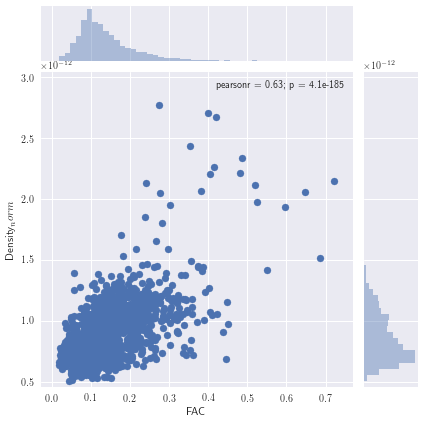

In [9]:
sns.jointplot("FAC", "Density_norm", shift2_df, ylim=[shift2_df.Density_norm.min()*0.9,shift2_df.Density_norm.max()*1.1]);

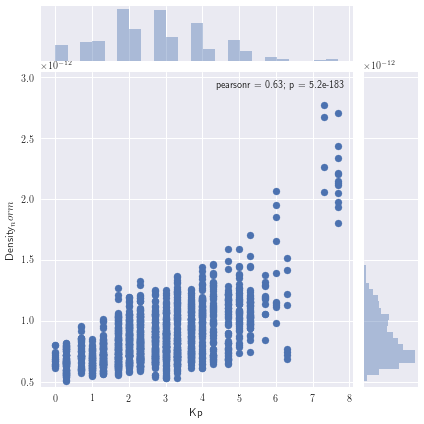

In [10]:
sns.jointplot("Kp", "Density_norm", shift2_df, ylim=[shift2_df.Density_norm.min()*0.9,shift2_df.Density_norm.max()*1.1]);